In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency, chi2, pearsonr, spearmanr
from scipy.stats.contingency import association
from scipy.stats import f_oneway, kruskal

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/raw/new_items_dataset.csv')
data.head()

,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,shipping_mode,shipping_admits_pickup,shipping_is_free,status,sub_status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
0,MLA578569012,Escritorio Secretter Espectacular,2015-09-08T21:17:57.000Z,6700.0,6700.0,MLA1902,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,custom,True,False,active,NaN,NaN,0,1.0,0.0,1.0
1,MLA576883746,Stassen Espatulas Milenio Numero 3 Codigo 590-3,2015-08-29T12:55:03.000Z,119.0,119.0,MLA3530,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,not_specified,False,False,active,NaN,Sí,1,19.0,0.0,19.0
2,MLA581002506,Charm Britania Plata 925 Ovalado!!! Armá La Tu...,2015-09-23T12:41:07.000Z,450.0,450.0,MLA6440,['dragged_bids_and_visits'],[],[],"[{'size': '312x308', 'secure_url': 'https://a2...",...,me2,False,False,active,NaN,Sí,1,2.0,0.0,2.0
3,MLA574707083,El Hombre De Magallanes Virginia Carreño Novela,2015-08-16T13:34:01.000Z,40.0,40.0,MLA2044,['dragged_bids_and_visits'],[],[],"[{'size': '375x500', 'secure_url': 'https://a2...",...,me2,True,False,active,NaN,Sí,0,1.0,0.0,1.0
4,MLA576209717,Molde Placa Boca Espejo Bota Labial Chupetin P...,2015-08-25T14:42:20.000Z,30.0,30.0,MLA34294,['dragged_bids_and_visits'],[],[],"[{'size': '396x500', 'secure_url': 'https://a2...",...,not_specified,True,False,active,NaN,NaN,1,1.0,1.0,1.0


# Variables por tipo de dato

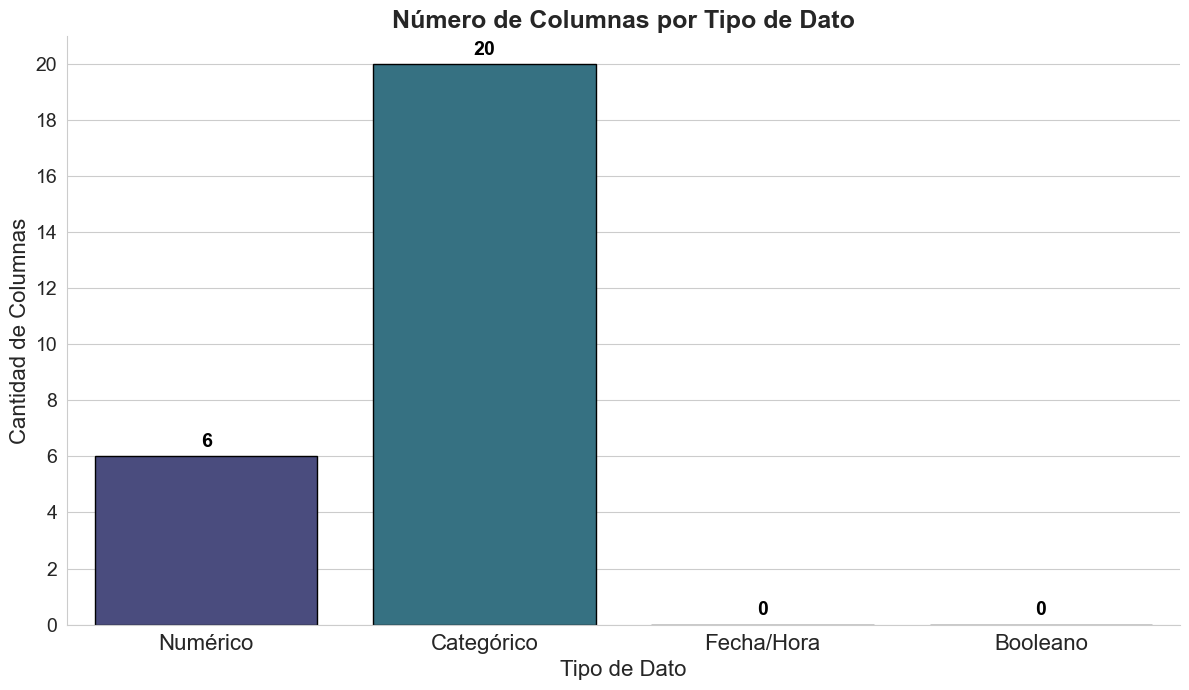

Numérico       6
Categórico    20
Fecha/Hora     0
Booleano       0
dtype: int64

In [3]:
def columns_by_dtype(data):
    """
    Función para contar el número de columnas por tipo de dato en un DataFrame.
    
    Args:
    data: El DataFrame del cual se quieren contar los tipos de datos.
    
    Return:
    Series: Conteo de columnas por tipo de dato.
    """

    # Clasificar columnas por tipo
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    datetime_cols = data.select_dtypes(include=['datetime64']).columns.tolist()
    boolean_cols = data.select_dtypes(include=['bool']).columns.tolist()

    # Crear un diccionario con los conteos
    dtype_counts = {
        'Numérico': len(numeric_cols),
        'Categórico': len(categorical_cols),
        'Fecha/Hora': len(datetime_cols),
        'Booleano': len(boolean_cols)
    }

    # Convertir el diccionario a una Serie
    dtype_counts = pd.Series(dtype_counts)

    # Estilo visual
    sns.set_style("whitegrid")

    # Crear figura
    plt.figure(figsize=(12, 7))

    # Crear gráfico de barras
    plot = sns.barplot(
        x=dtype_counts.index.astype(str),
        y=dtype_counts.values,
        palette=sns.color_palette("viridis", len(dtype_counts)),
        edgecolor='black'
    )

    # Añadir etiquetas encima de las barras
    for patch in plot.patches:
        height = patch.get_height()
        plot.text(
            x=patch.get_x() + patch.get_width() / 2,
            y=height + max(dtype_counts.values)*0.01,  # margen proporcional
            s=f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=14,
            color='black',
            weight='bold'
        )

    # Títulos y etiquetas
    plot.set_title('Número de Columnas por Tipo de Dato', fontsize=18, weight='bold')
    plot.set_xlabel('Tipo de Dato', fontsize=16)
    plot.set_ylabel('Cantidad de Columnas', fontsize=16)

    # Estética del eje X
    plot.set_xticklabels(plot.get_xticklabels(), fontsize=16)

    plot.set_yticks(range(0, int(max(dtype_counts.values)) + 2, 2))

    # Estética del eje Y
    plot.set_yticklabels(plot.get_yticklabels(), fontsize=14)

    # Quita borde superior y derecho
    sns.despine()

    # Ajuste del diseño
    plt.tight_layout()

    # Guardar y mostrar
    plt.savefig('../docs/grafico_tipos_de_datos.png', dpi=300, bbox_inches='tight')
    plt.show()

    return dtype_counts

data_types = columns_by_dtype(data)
data_types

# Valores nulos

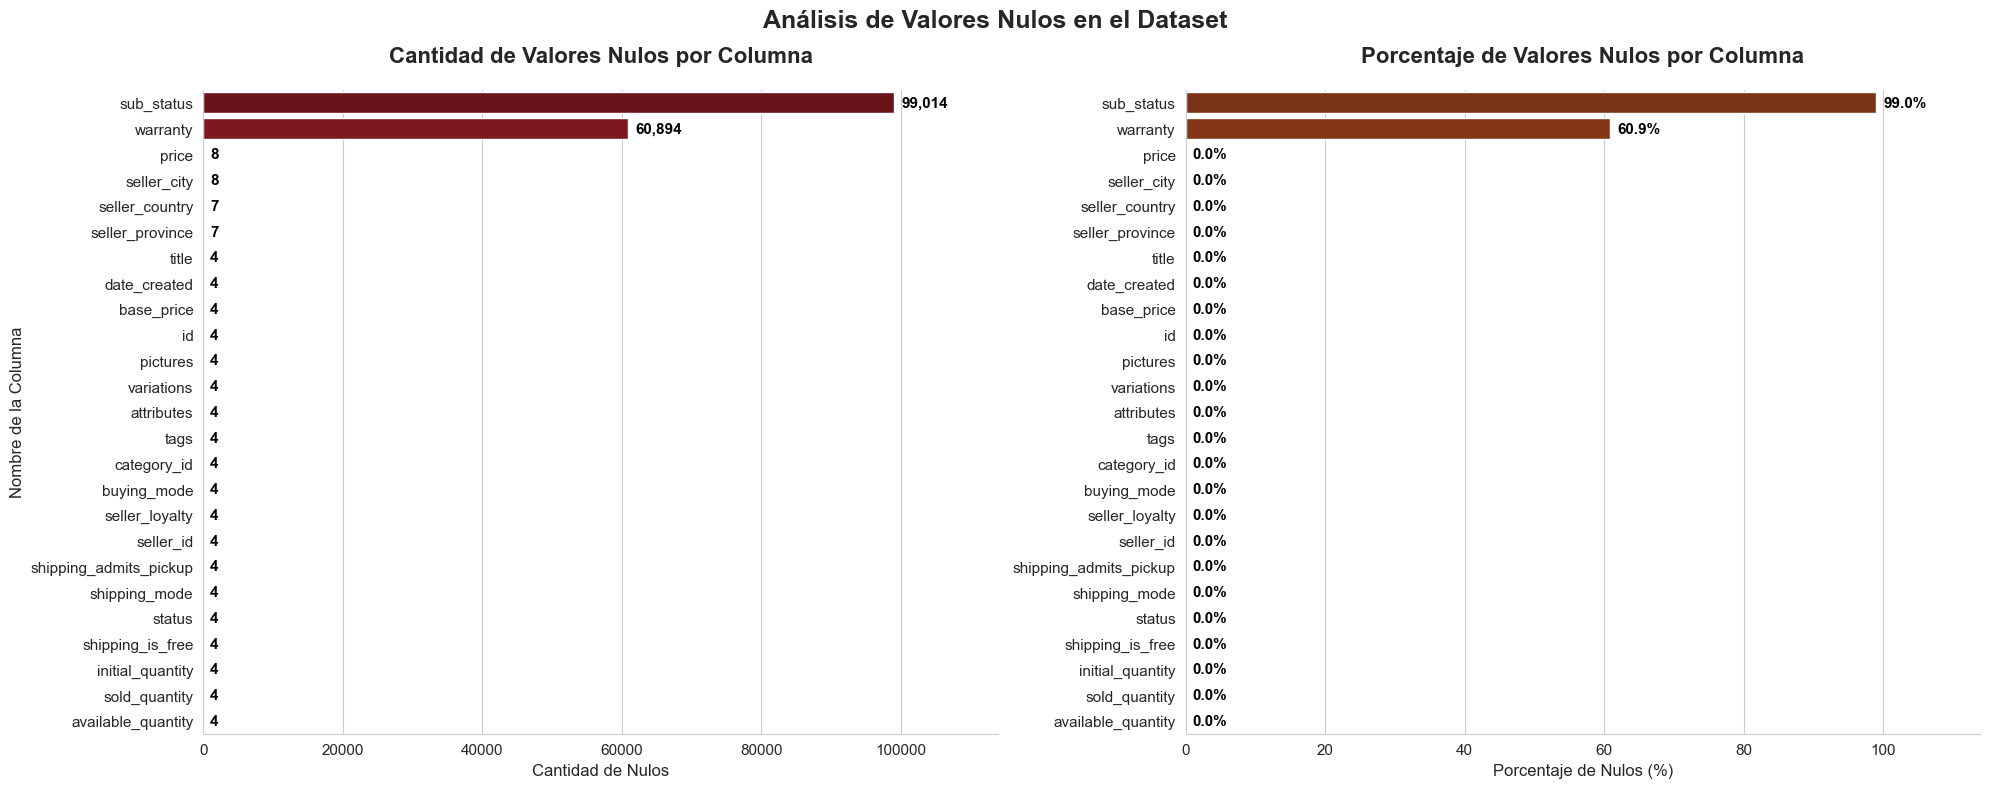

RESUMEN DE VALORES NULOS
Total de columnas: 26
Columnas con valores nulos: 25 (96.2%)
Total de valores nulos: 160,014
Porcentaje general de nulos: 6.15%

Top 5 columnas con más nulos:
  1. sub_status: 99,014.0 nulos (99.0%)
  2. warranty: 60,894.0 nulos (60.9%)
  3. price: 8.0 nulos (0.0%)
  4. seller_city: 8.0 nulos (0.0%)
  5. seller_country: 7.0 nulos (0.0%)


,Conteo,Porcentaje
sub_status,99014,99.014
warranty,60894,60.894
price,8,0.008
seller_city,8,0.008
seller_country,7,0.007
seller_province,7,0.007
title,4,0.004
date_created,4,0.004
base_price,4,0.004
id,4,0.004


In [4]:
def nulls_barplot(data):
    """
    Crea gráficos de barras horizontales para visualizar la cantidad y porcentaje de nulos por columna.
    Genera automáticamente ambos tipos de visualización.
    
    Args:
    - data (DataFrame): El DataFrame del cual se quieren contar los valores nulos.
    
    Returns:
    - null_df (DataFrame): DataFrame con conteo y porcentaje de nulos por columna.
    """

    # Número de valores nulos por columna
    null_counts = data.isnull().sum().sort_values(ascending=False)

    # Porcentaje de nulos
    null_percentage = (null_counts / len(data)) * 100

    # Crear un DataFrame para los nulos
    null_df = pd.DataFrame({
        'Conteo': null_counts,
        'Porcentaje': null_percentage
    })

    # Filtrar solo columnas que tienen al menos un valor nulo
    null_df_filtered = null_df[null_df['Conteo'] > 0]
    
    if null_df_filtered.empty:
        print("✅ No se encontraron valores nulos en el dataset")
        return null_df

    # Configurar el estilo
    sns.set_style("whitegrid")
    
    # Crear figura con subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # === GRÁFICO 1: CONTEO DE NULOS ===
    sns.barplot(
        x=null_df_filtered['Conteo'],
        y=null_df_filtered.index,
        orient='h',
        ax=ax1,
        palette='Reds_r'
    )

    # Añadir etiquetas de valores en el gráfico de conteo
    for patch in ax1.patches:
        ax1.text(
            patch.get_width() + (null_df_filtered['Conteo'].max() * 0.01),
            patch.get_y() + patch.get_height() / 2.,
            f'{int(patch.get_width()):,}',  # Formato con comas para miles
            ha='left',
            va='center',
            fontsize=11,
            color='black',
            weight='bold'
        )

    # Configurar el primer gráfico
    ax1.set_title('Cantidad de Valores Nulos por Columna', fontsize=16, weight='bold', pad=20)
    ax1.set_xlabel('Cantidad de Nulos', fontsize=12)
    ax1.set_ylabel('Nombre de la Columna', fontsize=12)
    ax1.tick_params(axis='y', labelsize=11)
    ax1.tick_params(axis='x', labelsize=11)
    ax1.set_xlim(0, null_df_filtered['Conteo'].max() * 1.15)

    # === GRÁFICO 2: PORCENTAJE DE NULOS ===
    sns.barplot(
        x=null_df_filtered['Porcentaje'],
        y=null_df_filtered.index,
        orient='h',
        ax=ax2,
        palette='Oranges_r'
    )

    # Añadir etiquetas de valores en el gráfico de porcentaje
    for patch in ax2.patches:
        ax2.text(
            patch.get_width() + (null_df_filtered['Porcentaje'].max() * 0.01),
            patch.get_y() + patch.get_height() / 2.,
            f'{patch.get_width():.1f}%',
            ha='left',
            va='center',
            fontsize=11,
            color='black',
            weight='bold'
        )

    # Configurar el segundo gráfico
    ax2.set_title('Porcentaje de Valores Nulos por Columna', fontsize=16, weight='bold', pad=20)
    ax2.set_xlabel('Porcentaje de Nulos (%)', fontsize=12)
    ax2.set_ylabel('', fontsize=12)  # Ocultar ylabel del segundo gráfico
    ax2.tick_params(axis='y', labelsize=11)
    ax2.tick_params(axis='x', labelsize=11)
    ax2.set_xlim(0, null_df_filtered['Porcentaje'].max() * 1.15)

    # Título general de la figura
    fig.suptitle('Análisis de Valores Nulos en el Dataset', fontsize=18, weight='bold', y=0.98)

    # Quitar bordes superiores y derechos
    sns.despine(ax=ax1)
    sns.despine(ax=ax2)

    # Ajustar el diseño
    plt.tight_layout()

    # Guardar la imagen
    plt.savefig('../docs/analisis_nulos_completo.png', dpi=300, bbox_inches='tight')

    # Mostrar el gráfico
    plt.show()

    # Mostrar resumen estadístico
    print("="*60)
    print("RESUMEN DE VALORES NULOS")
    print("="*60)
    
    total_columns = len(data.columns)
    columns_with_nulls = len(null_df_filtered)
    total_nulls = null_df['Conteo'].sum()
    total_cells = len(data) * len(data.columns)
    overall_null_percentage = (total_nulls / total_cells) * 100
    
    print(f"Total de columnas: {total_columns}")
    print(f"Columnas con valores nulos: {columns_with_nulls} ({columns_with_nulls/total_columns*100:.1f}%)")
    print(f"Total de valores nulos: {total_nulls:,}")
    print(f"Porcentaje general de nulos: {overall_null_percentage:.2f}%")
    
    if columns_with_nulls > 0:
        print(f"\nTop 5 columnas con más nulos:")
        for i, (col, row) in enumerate(null_df_filtered.head(5).iterrows(), 1):
            print(f"  {i}. {col}: {row['Conteo']:,} nulos ({row['Porcentaje']:.1f}%)")
    
    print("="*60)

    return null_df

nulls_barplot(data)


# Distribución de los datos

## Categóricos

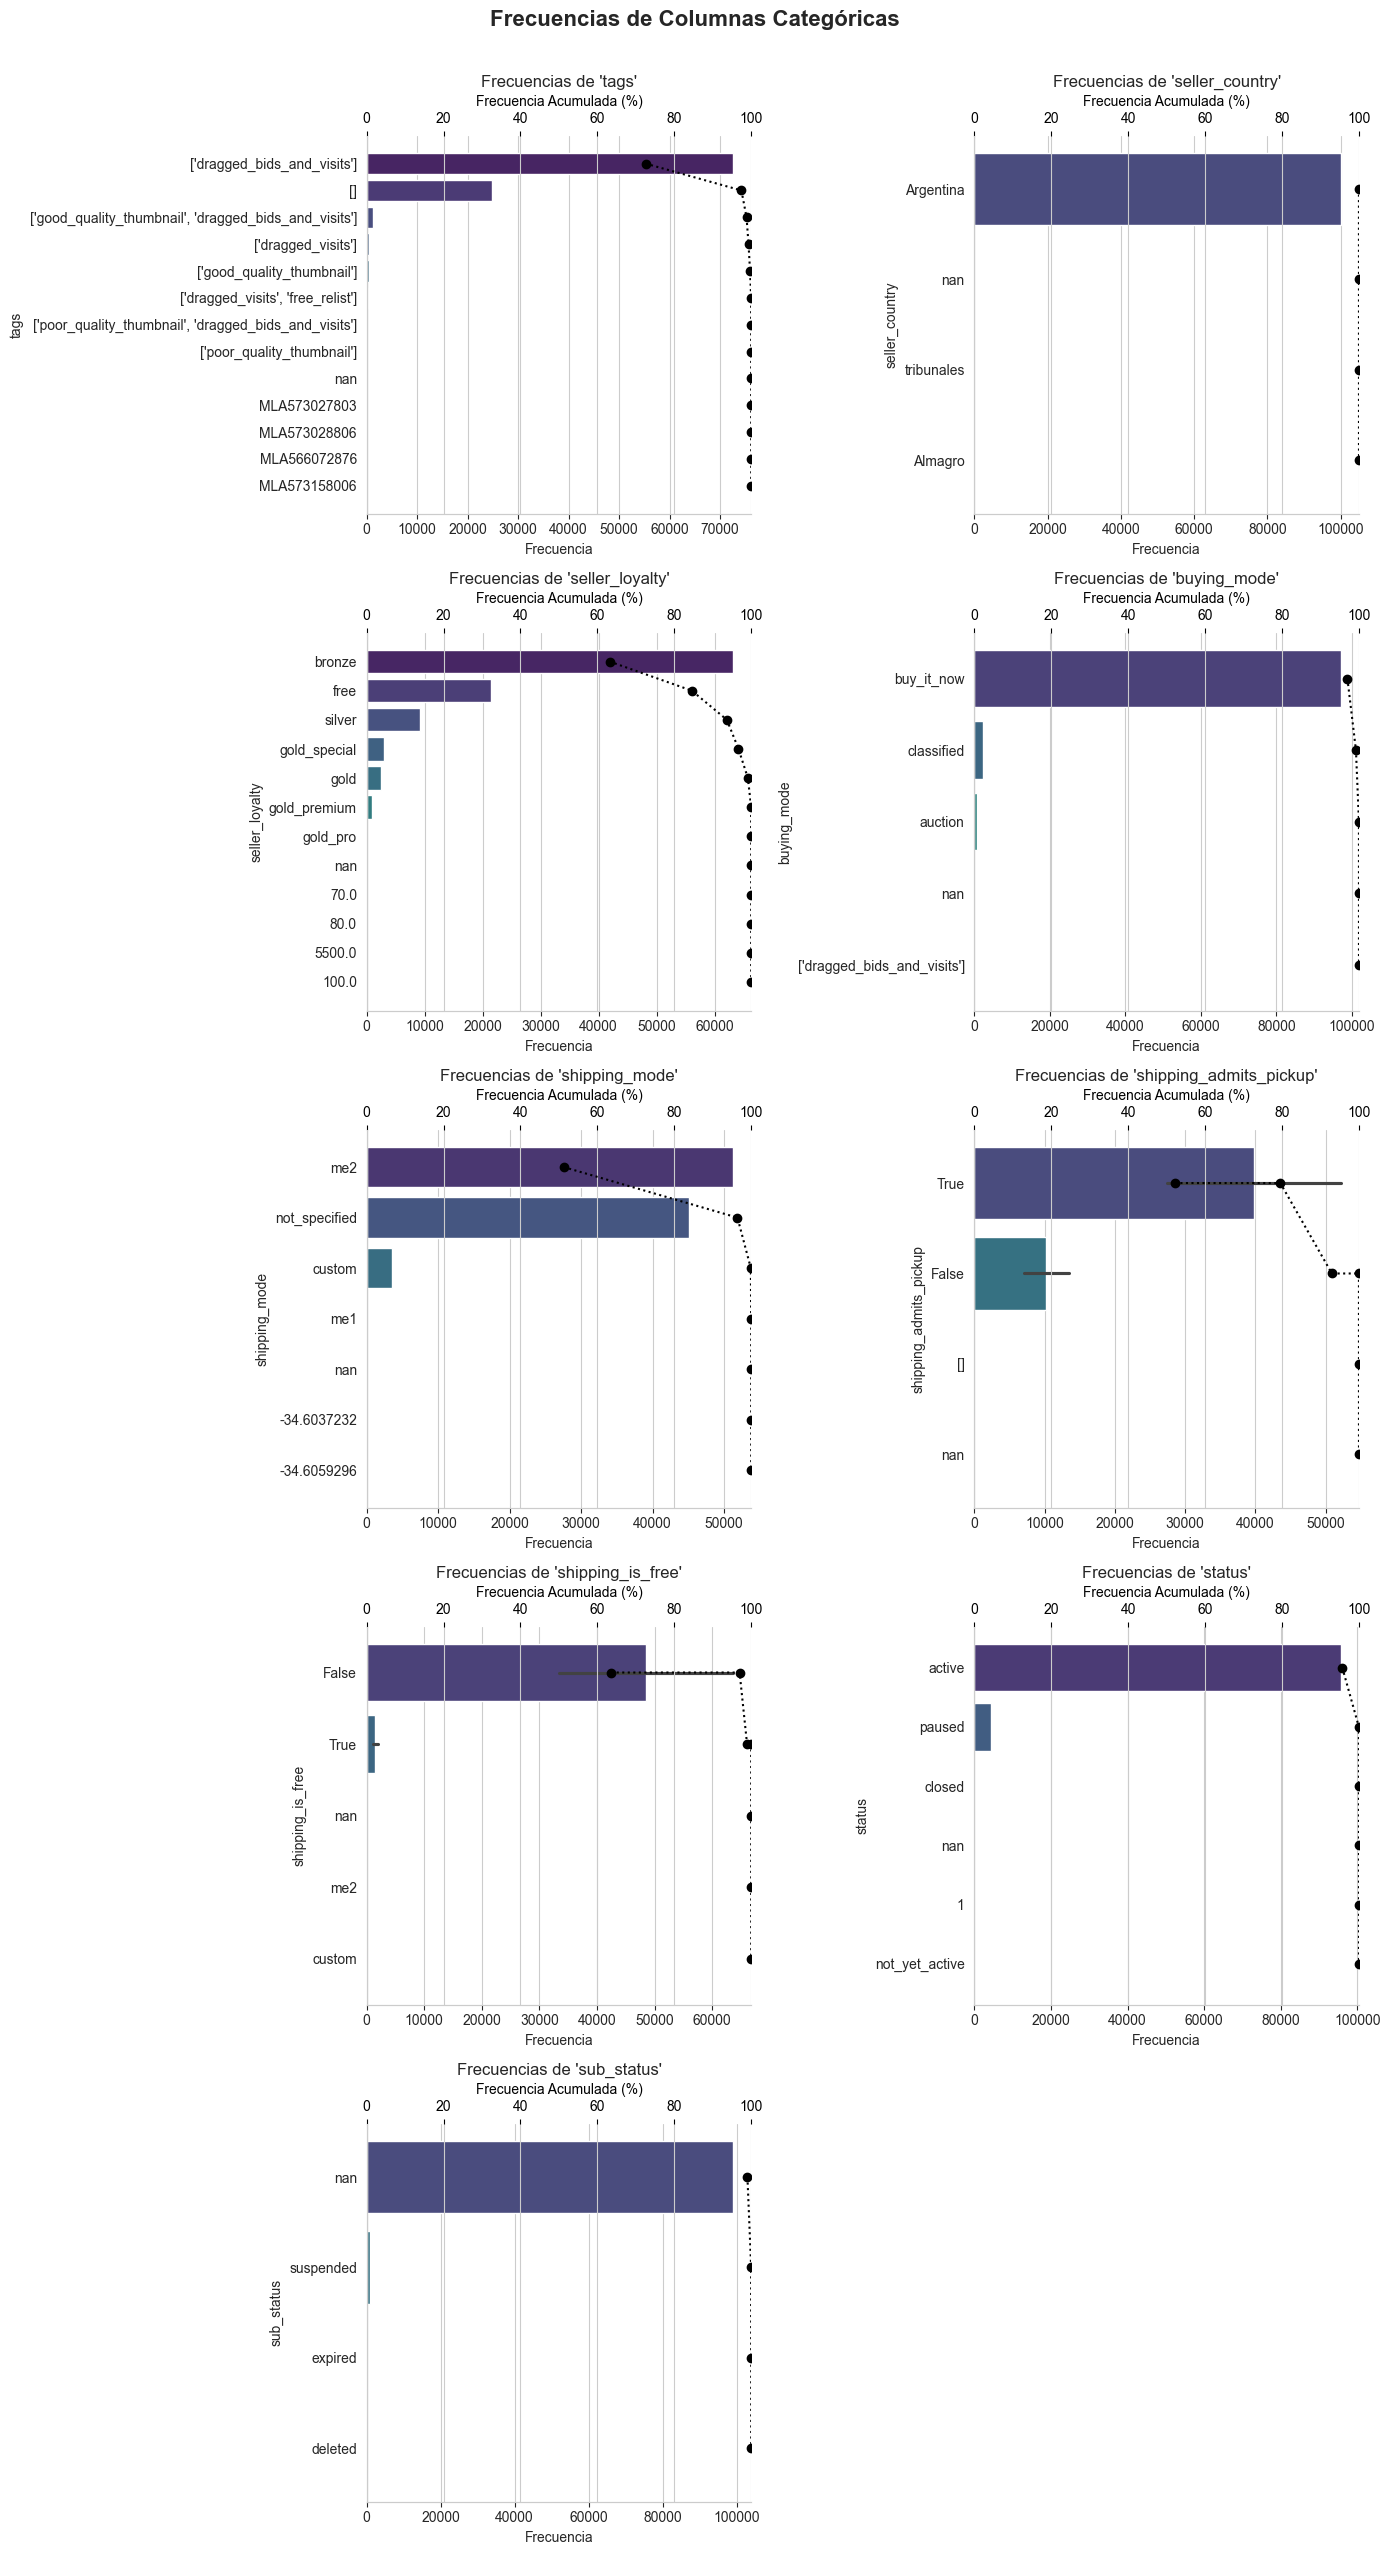

In [5]:
def frecuencia_categoricas(data, max_values=50):
    """
    Genera tablas y gráficas de frecuencia para las columnas categóricas de un DataFrame,
    mostrando todas las gráficas en un solo subplot. Solo se grafican columnas con <= max_values valores únicos.
    Además, muestra la frecuencia acumulada con una línea punteada en cada subplot.

    Args:
        data (pd.DataFrame): DataFrame de entrada.
        max_values (int): Número máximo de categorías únicas para graficar y mostrar frecuencias.

    Returns:
        dict: Diccionario con tablas de frecuencia por columna.
    """
    # Seleccionar columnas categóricas con <= max_values valores únicos
    cat_cols = [col for col in data.select_dtypes(include=['object', 'category']).columns
                if data[col].nunique(dropna=False) <= max_values]
    tablas_frecuencia = {}

    n_cols = 2
    n_rows = int(np.ceil(len(cat_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(cat_cols):
        freq = data[col].value_counts(dropna=False)
        tablas_frecuencia[col] = freq

        # Frecuencia acumulada
        freq_acum = freq.cumsum() / freq.sum() * 100

        sns.barplot(
            x=freq.values,
            y=freq.index.astype(str),
            palette="viridis",
            ax=axes[idx]
        )
        axes[idx].set_title(f"Frecuencias de '{col}'")
        axes[idx].set_xlabel("Frecuencia")
        axes[idx].set_ylabel(col)

        # Graficar la frecuencia acumulada
        axes2 = axes[idx].twiny()
        axes2.plot(freq_acum.values, freq.index.astype(str), color='black', linestyle='dotted', marker='o')
        axes2.set_xlim(0, 100)
        axes2.set_xlabel('Frecuencia Acumulada (%)', color='black')
        axes2.tick_params(axis='x', colors='black')

    # Eliminar subplots vacíos si hay
    for j in range(len(cat_cols), len(axes)):
        fig.delaxes(axes[j])

    # Quita borde superior y derecho
    sns.despine()

    # Ajuste del diseño
    plt.tight_layout()

    # Título general
    plt.suptitle('Frecuencias de Columnas Categóricas', fontsize=16, weight='bold', y=1.02)

    # Guardar y mostrar
    plt.savefig(f'../docs/frecuencias_categóricas.png', dpi=300, bbox_inches='tight')

    plt.show()

    return tablas_frecuencia

# Ejemplo de uso:
frecuencias = frecuencia_categoricas(data, max_values=15)

## Numéricos

In [6]:
def analisis_numericas(data, bins=50):
    """
    Genera un análisis descriptivo y visual para las columnas numéricas.

    Para cada columna numérica, calcula estadísticas y genera un histograma y
    un boxplot.

    Args:
        data (pd.DataFrame): DataFrame de entrada.
        bins (int): Número de bins para los histogramas.

    Returns:
        tuple: Una tupla conteniendo:
            - dict: Estadísticas descriptivas para cada columna numérica.
            - str: La tabla de estadísticas en formato Markdown.
    """
    # 1. Seleccionar solo columnas numéricas
    num_cols = data.select_dtypes(include=np.number).columns
    if len(num_cols) == 0:
        print("No se encontraron columnas numéricas.")
        return {}, ""

    # 2. Calcular estadísticas descriptivas para datos completos
    descriptive_stats = {}
    for col in num_cols:
        base_stats = data[col].describe()
        # Agregar percentiles adicionales (1%, 5%, 10%, 90%, 95%, 99%)
        p1 = data[col].quantile(0.01)
        p5 = data[col].quantile(0.05)
        p10 = data[col].quantile(0.10)
        p90 = data[col].quantile(0.90)
        p95 = data[col].quantile(0.95)
        p99 = data[col].quantile(0.99)
        
        # Crear diccionario extendido con los nuevos percentiles
        extended_stats = base_stats.to_dict()
        extended_stats['1%'] = p1
        extended_stats['5%'] = p5
        extended_stats['10%'] = p10
        extended_stats['90%'] = p90
        extended_stats['95%'] = p95
        extended_stats['99%'] = p99
        
        # Convertir de vuelta a Series para mantener compatibilidad
        descriptive_stats[col] = pd.Series(extended_stats)

    # 3. Crear la figura y los subplots
    n_rows = len(num_cols)
    n_cols = 2
    figsize = (14, 5 * n_rows)
    gridspec_kw = {'width_ratios': [4, 1]}

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize,
                             gridspec_kw=gridspec_kw, squeeze=False)

    fig.suptitle('Análisis Descriptivo de Columnas Numéricas', fontsize=16, weight='bold', y=1.02)

    # 4. Iterar sobre cada columna numérica y graficar
    for i, col in enumerate(num_cols):
        # Histograma con la distribución completa
        ax_hist_full = axes[i, 0]
        sns.histplot(data=data, x=col, bins=bins, ax=ax_hist_full, kde=True)
        ax_hist_full.set_xlabel("Valor")
        ax_hist_full.set_ylabel("Frecuencia")
        ax_hist_full.set_title(f"Distribución de '{col}'")

        # Boxplot con la distribución completa
        ax_box_full = axes[i, 1]
        sns.boxplot(y=data[col], ax=ax_box_full)
        ax_box_full.set_title(f"Boxplot de '{col}'")
        ax_box_full.set_ylabel("")
        ax_box_full.set_xticks([])

    # Quita borde superior y derecho
    sns.despine()

    # Ajuste del diseño
    plt.tight_layout()
    
    # Descomenta la siguiente línea para guardar la imagen
    plt.savefig('../docs/distribucion_numericas.png', dpi=300, bbox_inches='tight')
    
    plt.show()

    # 5. Función auxiliar para crear tabla Markdown
    def create_markdown_table(stats_dict, title):
        """Crea una tabla Markdown a partir de un diccionario de estadísticas."""
        stats_df = pd.DataFrame(stats_dict).round(2)
        
        # Traducir las etiquetas de estadísticas al español
        translation_map = {
            'count': 'Registros',
            'mean': 'Media',
            'std': 'Desviación Estándar',
            'min': 'Mínimo',
            '50%': 'Mediana',
            'max': 'Máximo'
        }
        
        # Aplicar traducción
        stats_df.index = stats_df.index.map(lambda x: translation_map.get(x, x))
        
        # Reordenar las filas para que los percentiles aparezcan en orden lógico
        desired_order = ['Registros', 'Media', 'Mediana', 'Desviación Estándar', 'Mínimo', '1%', '5%', '10%', '25%', '75%', '90%', '95%', '99%', 'Máximo']
        # Filtrar solo las estadísticas que existen en el DataFrame
        existing_order = [stat for stat in desired_order if stat in stats_df.index]
        # Agregar cualquier estadística adicional que no esté en el orden deseado
        remaining_stats = [stat for stat in stats_df.index if stat not in existing_order]
        final_order = existing_order + remaining_stats
        
        # Reordenar el DataFrame
        stats_df = stats_df.reindex(final_order)
        
        # Creación manual de la tabla Markdown
        header_list = ["Estadística"] + list(stats_df.columns)
        header_str = "| " + " | ".join(header_list) + " |"
        separator_str = "|:---| " + " | ".join([":---"] * len(stats_df.columns)) + " |"
        body_lines = [f"| **{index}** | " + " | ".join(map(str, row.values)) + " |" 
                     for index, row in stats_df.iterrows()]
        markdown_table = f"{header_str}\n{separator_str}\n" + "\n".join(body_lines)
        
        print(f"--- {title} ---")
        print(markdown_table)
        print()  # Línea en blanco para separación
        
        return markdown_table

    # 6. Crear tabla Markdown
    markdown_table_full = create_markdown_table(descriptive_stats, 
                                               "Estadísticas Descriptivas")
    
    return descriptive_stats, markdown_table_full

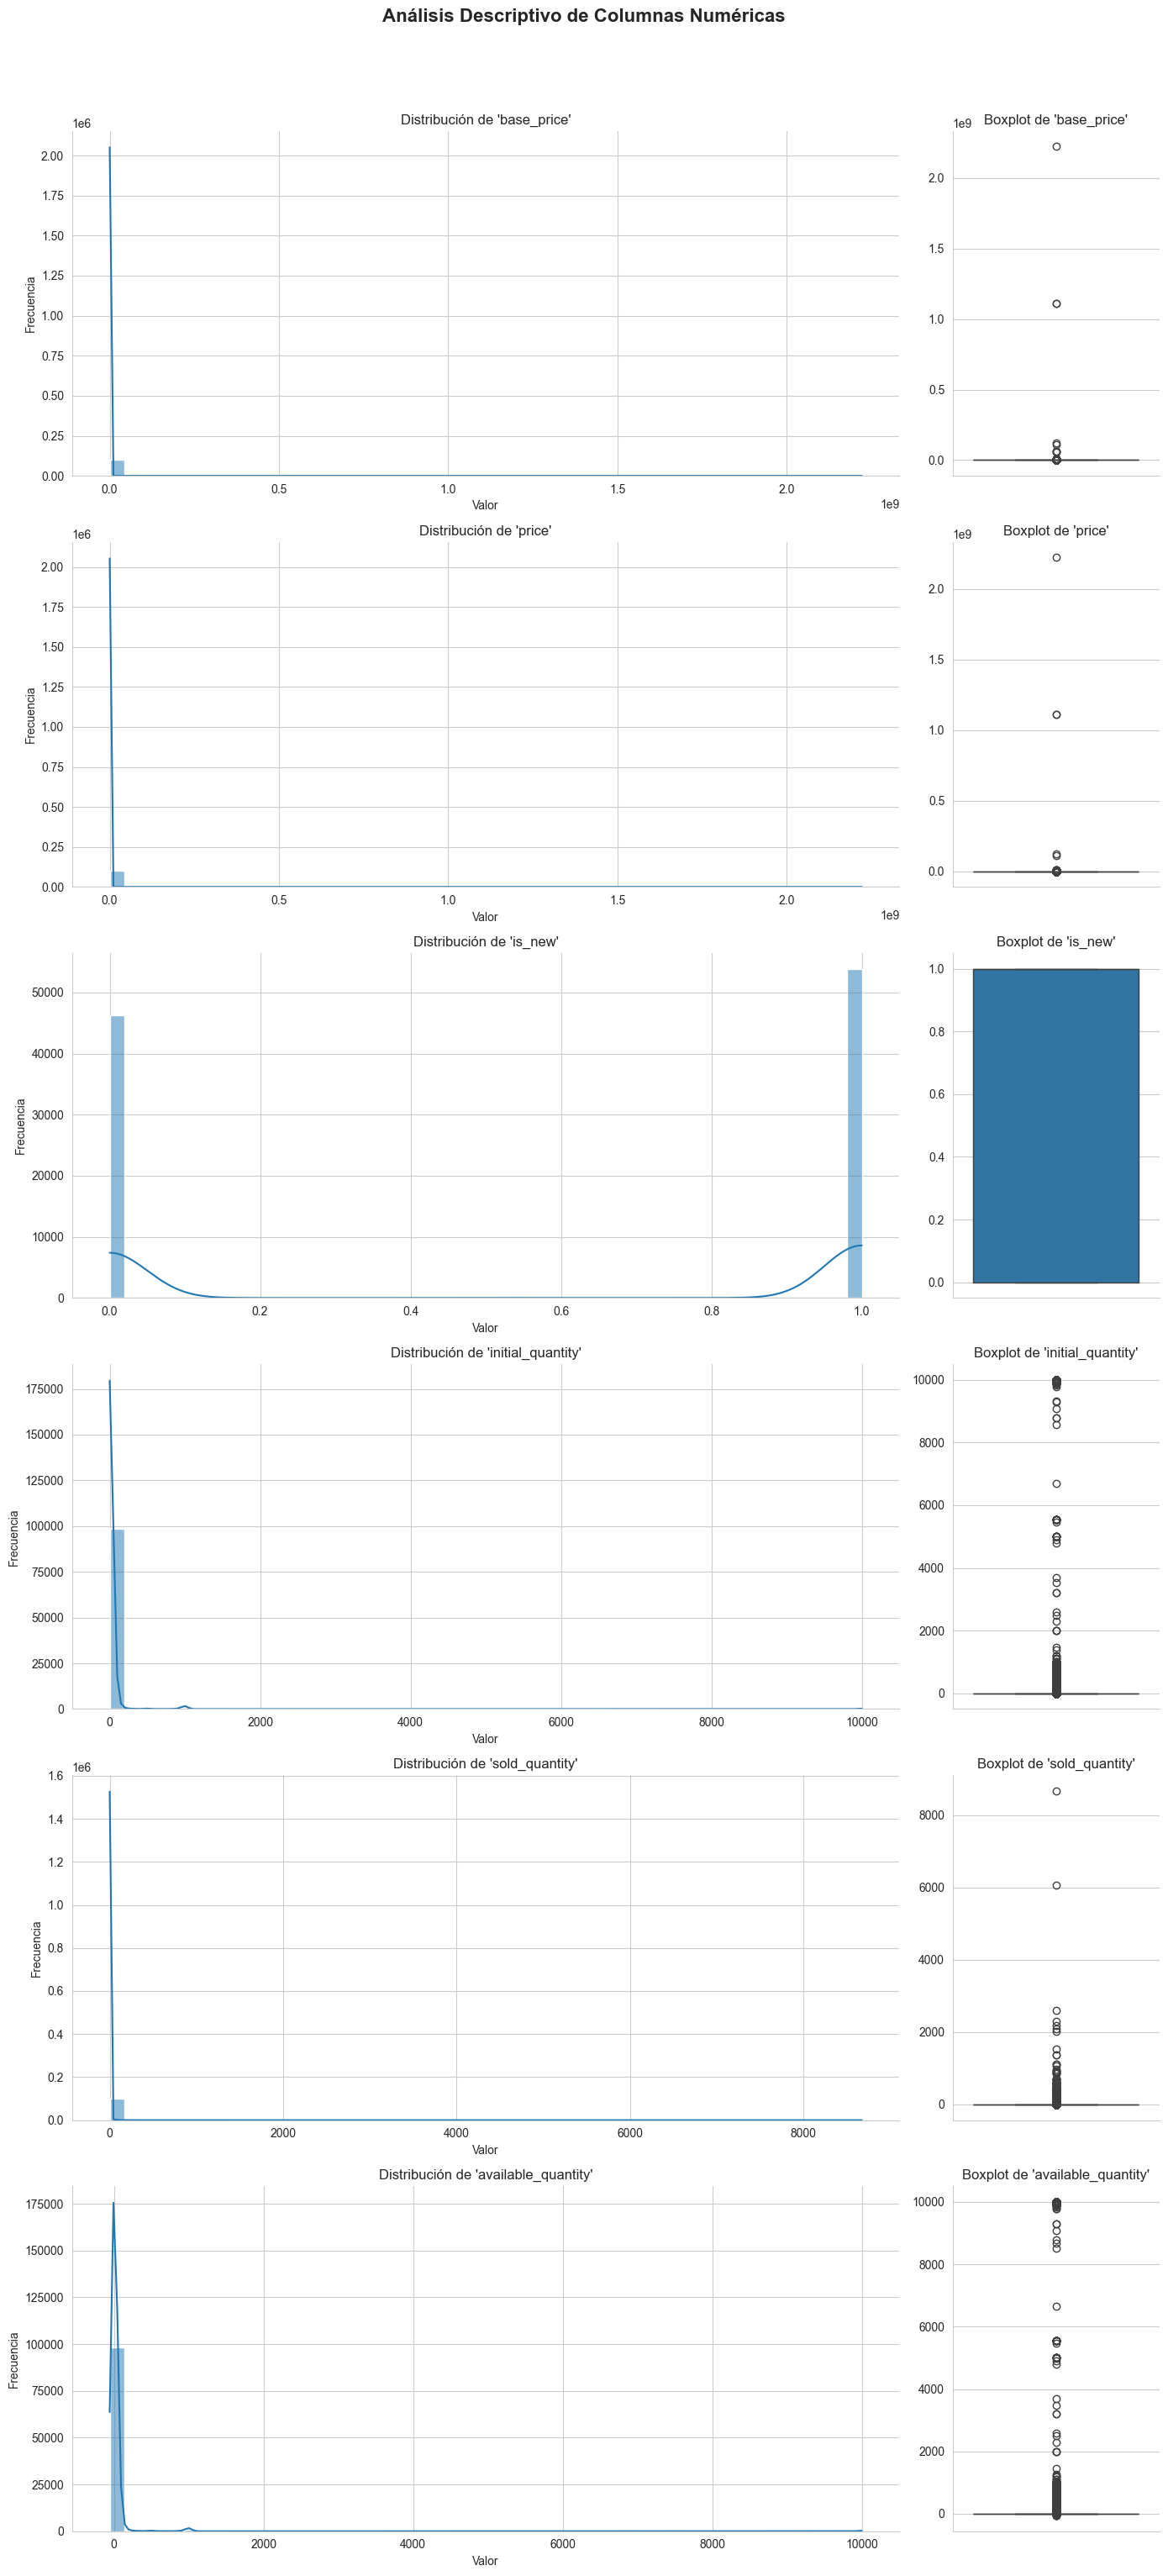

--- Estadísticas Descriptivas ---
| Estadística | base_price | price | is_new | initial_quantity | sold_quantity | available_quantity |
|:---| :--- | :--- | :--- | :--- | :--- | :--- |
| **Registros** | 99996.0 | 99992.0 | 100000.0 | 99996.0 | 99996.0 | 99996.0 |
| **Media** | 55067.93 | 52528.46 | 0.54 | 35.09 | 2.4 | 34.84 |
| **Mediana** | 250.0 | 250.0 | 1.0 | 1.0 | 0.0 | 1.0 |
| **Desviación Estándar** | 8632656.34 | 8623472.1 | 0.5 | 421.08 | 42.69 | 420.82 |
| **Mínimo** | 0.84 | 0.84 | 0.0 | 0.0 | 0.0 | -58.42 |
| **1%** | 17.0 | 17.0 | 0.0 | 1.0 | 0.0 | 1.0 |
| **5%** | 35.0 | 35.0 | 0.0 | 1.0 | 0.0 | 1.0 |
| **10%** | 49.99 | 49.99 | 0.0 | 1.0 | 0.0 | 1.0 |
| **25%** | 90.0 | 90.0 | 0.0 | 1.0 | 0.0 | 1.0 |
| **75%** | 800.0 | 800.0 | 1.0 | 2.0 | 0.0 | 2.0 |
| **90%** | 3100.0 | 3100.0 | 1.0 | 10.0 | 2.0 | 10.0 |
| **95%** | 7500.0 | 7500.0 | 1.0 | 45.0 | 5.0 | 43.0 |
| **99%** | 130000.0 | 130000.0 | 1.0 | 990.0 | 41.0 | 987.05 |
| **Máximo** | 2222222222.0 | 2222222222.0 | 1

In [7]:
descriptive_stats, markdown_table_full = analisis_numericas(data, bins=50)

# Correlación

## Correlación categóricas

⚠️  Excluida 'id': 99996 categorías únicas
⚠️  Excluida 'title': 98816 categorías únicas
⚠️  Excluida 'date_created': 87072 categorías únicas
⚠️  Excluida 'category_id': 10911 categorías únicas
⚠️  Excluida 'attributes': 3454 categorías únicas
⚠️  Excluida 'variations': 8193 categorías únicas
⚠️  Excluida 'pictures': 98152 categorías únicas
⚠️  Excluida 'seller_id': 43380 categorías únicas
⚠️  Excluida 'seller_city': 3655 categorías únicas
⚠️  Excluida 'warranty': 10264 categorías únicas
✅ Analizando 10 variables: ['tags', 'seller_country', 'seller_province', 'seller_loyalty', 'buying_mode', 'shipping_mode', 'shipping_admits_pickup', 'shipping_is_free', 'status', 'sub_status']


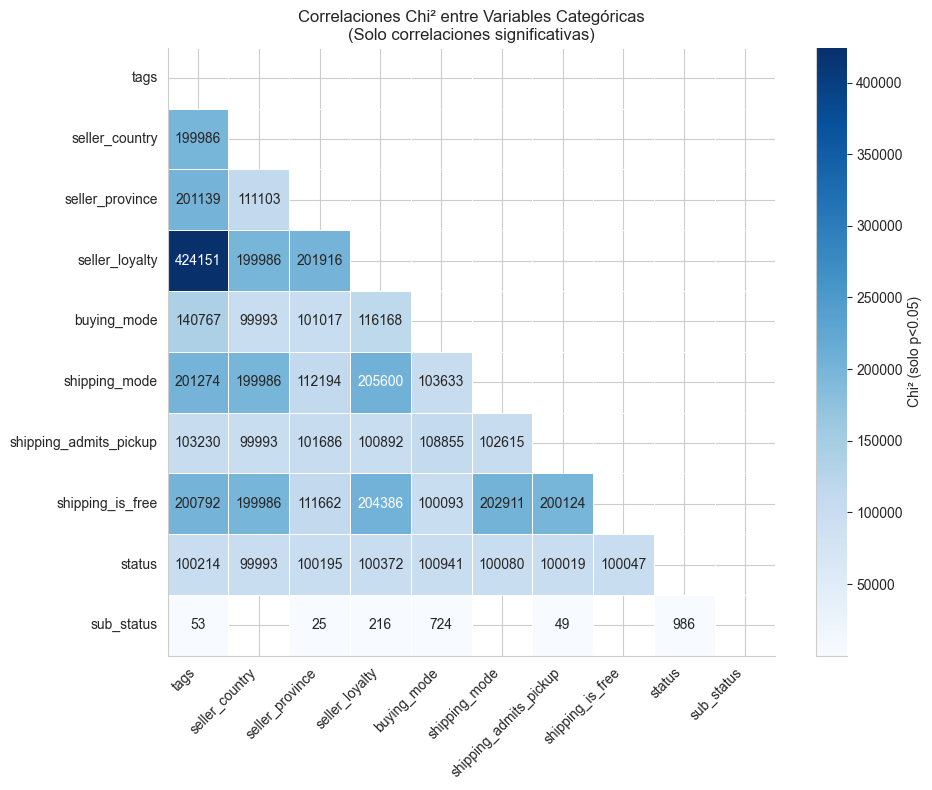


📊 Resultado:
   • Correlaciones significativas: 42/45
   • Rango Chi²: 25 - 424151
   • Promedio Chi²: 125239


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

def chi2_correlation(data, max_categories=50, min_samples=30, figsize=(10, 8)):
    """
    Función simple para medir correlación entre variables categóricas usando chi2.
    
    Args:
        data: DataFrame con variables categóricas
        max_categories: Máximo número de categorías únicas por variable
        min_samples: Mínimo número de muestras válidas por par
        figsize: Tamaño del gráfico
    """
    
    # 1. Seleccionar solo variables categóricas
    cat_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    if not cat_cols:
        print("❌ No se encontraron variables categóricas")
        return
    
    # 2. Filtrar variables con pocas categorías
    valid_cols = []
    for col in cat_cols:
        n_unique = data[col].nunique()
        if 2 <= n_unique <= max_categories:  # Al menos 2 categorías, máximo el límite
            valid_cols.append(col)
        else:
            print(f"⚠️  Excluida '{col}': {n_unique} categorías únicas")
    
    if len(valid_cols) < 2:
        print("❌ Se necesitan al menos 2 variables categóricas válidas")
        return
    
    print(f"✅ Analizando {len(valid_cols)} variables: {valid_cols}")
    
    # 3. Calcular matriz chi2
    n_vars = len(valid_cols)
    chi2_matrix = np.full((n_vars, n_vars), np.nan)
    
    for i in range(n_vars):
        for j in range(i+1, n_vars):  # Solo mitad superior
            col1, col2 = valid_cols[i], valid_cols[j]
            
            # Datos válidos para este par
            valid_data = data[[col1, col2]].dropna()
            
            if len(valid_data) < min_samples:
                continue
                
            try:
                # Tabla de contingencia
                contingency = pd.crosstab(valid_data[col1], valid_data[col2])
                
                # Chi2
                chi2_stat, p_value, _, _ = chi2_contingency(contingency)
                
                # Solo guardar si es significativo (p < 0.05)
                if p_value < 0.05:
                    chi2_matrix[i, j] = chi2_stat
                    chi2_matrix[j, i] = chi2_stat  # Matriz simétrica
                    
            except:
                continue
    
    # 4. Crear DataFrame para el heatmap
    chi2_df = pd.DataFrame(chi2_matrix, index=valid_cols, columns=valid_cols)
    
    # 5. Verificar que hay correlaciones para mostrar
    if chi2_df.isna().all().all():
        print("❌ No se encontraron correlaciones significativas")
        return
    
    # 6. Graficar
    plt.figure(figsize=figsize)
    
    # Crear máscara para mostrar SOLO triángulo inferior
    mask = np.triu(np.ones_like(chi2_matrix, dtype=bool))  # Ocultar triángulo superior y diagonal
    
    sns.heatmap(
        chi2_df,
        mask=mask,
        annot=True,
        fmt='.0f',
        cmap='Blues',
        square=True,
        linewidths=0.5,
        cbar_kws={'label': 'Chi² (solo p<0.05)'}
    )
    
    plt.title('Correlaciones Chi² entre Variables Categóricas\n(Solo correlaciones significativas)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Quita borde superior y derecho
    sns.despine()

    # Ajuste del diseño
    plt.tight_layout()
    
    # Descomenta la siguiente línea para guardar la imagen
    plt.savefig('../docs/correlaciones_categoricas.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # 7. Resumen
    valid_correlations = (~np.isnan(chi2_matrix)).sum() // 2  # Dividir por 2 (matriz simétrica)
    total_possible = (n_vars * (n_vars - 1)) // 2
    
    print(f"\n📊 Resultado:")
    print(f"   • Correlaciones significativas: {valid_correlations}/{total_possible}")
    
    if valid_correlations > 0:
        valid_values = chi2_matrix[~np.isnan(chi2_matrix)]
        print(f"   • Rango Chi²: {valid_values.min():.0f} - {valid_values.max():.0f}")
        print(f"   • Promedio Chi²: {valid_values.mean():.0f}")

# Ejemplo de uso:
chi2_correlation(data)
# chi2_correlation(df, max_categories=30, min_samples=50)

# Resultado: Solo se mostrará el triángulo inferior del heatmap
# - Evita duplicación de información
# - Gráfico más limpio y fácil de leer
# - Cada correlación aparece solo una vez

## Correlación numéricas

In [9]:
def analisis_correlaciones_numericas(df, threshold=0.1, method='all', 
                                   figsize=(16, 12), show_values=True, save_plots=False):
    """
    Análisis completo de correlaciones entre variables numéricas.
    
    Args:
        df (pd.DataFrame): DataFrame de entrada
        threshold (float): Umbral mínimo para mostrar correlaciones (default: 0.1)
        method (str): Métodos de correlación - 'pearson', 'spearman', 'all'
        figsize (tuple): Tamaño de las figuras
        show_values (bool): Mostrar valores en los heatmaps
        save_plots (bool): Guardar gráficos como archivos
    
    Returns:
        dict: Diccionario con matrices de correlación, estadísticas y análisis
    """
    
    print("="*70)
    print("ANÁLISIS COMPLETO DE CORRELACIONES NUMÉRICAS")
    print("="*70)
    
    # 1. IDENTIFICAR Y PREPARAR VARIABLES NUMÉRICAS
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_cols) < 2:
        print("❌ Error: Se necesitan al menos 2 variables numéricas para análisis de correlación")
        return {}
    
    print(f"📊 Variables numéricas encontradas: {len(numeric_cols)}")
    for col in numeric_cols:
        non_null = df[col].notna().sum()
        null_pct = (df[col].isnull().sum() / len(df)) * 100
        print(f"   • {col}: {non_null:,} valores válidos ({null_pct:.1f}% nulos)")
    print()
    
    # 2. PREPARAR DATOS
    df_numeric = df[numeric_cols].copy()
    
    # 3. ESTADÍSTICAS DESCRIPTIVAS
    print("📈 ESTADÍSTICAS DESCRIPTIVAS")
    print("-" * 50)
    
    desc_stats = df_numeric.describe()
    print(desc_stats.round(3))
    print()
    
    # 5. CÁLCULO DE CORRELACIONES
    print("🔗 CÁLCULO DE CORRELACIONES")
    print("-" * 50)
    
    correlation_results = {}
    
    # Determinar qué métodos usar
    methods_to_use = []
    if method == 'all':
        methods_to_use = ['pearson', 'spearman']
    else:
        methods_to_use = [method]
    
    for corr_method in methods_to_use:
        print(f"Calculando correlaciones {corr_method.title()}...")
        
        corr_matrix = df_numeric.corr(method=corr_method)
        
        correlation_results[corr_method] = corr_matrix
    
    # 6. ANÁLISIS DE CORRELACIONES SIGNIFICATIVAS
    print("\n🎯 CORRELACIONES SIGNIFICATIVAS")
    print("-" * 50)
    
    significant_correlations = {}
    
    for corr_method, corr_matrix in correlation_results.items():
        significant_pairs = []
        
        for i in range(len(numeric_cols)):
            for j in range(i+1, len(numeric_cols)):
                if i < len(corr_matrix) and j < len(corr_matrix.columns):
                    corr_val = corr_matrix.iloc[i, j]
                    
                    if not np.isnan(corr_val) and abs(corr_val) >= threshold:
                        # Calcular p-valor para la correlación
                        col1, col2 = numeric_cols[i], numeric_cols[j]
                        
                        # Usar datos válidos para ambas variables
                        valid_data = df_numeric[[col1, col2]].dropna()
                        
                        if len(valid_data) >= 10:
                            try:
                                if corr_method == 'pearson':
                                    _, p_value = pearsonr(valid_data[col1], valid_data[col2])
                                elif corr_method == 'spearman':
                                    _, p_value = spearmanr(valid_data[col1], valid_data[col2])
                                
                                significant_pairs.append({
                                    'var1': col1,
                                    'var2': col2,
                                    'correlation': corr_val,
                                    'p_value': p_value,
                                    'n_valid': len(valid_data),
                                    'abs_correlation': abs(corr_val),
                                    'strength': classify_correlation_strength(abs(corr_val)),
                                    'direction': 'Positiva' if corr_val > 0 else 'Negativa'
                                })
                            except:
                                continue
        
        # Ordenar por correlación absoluta
        significant_pairs.sort(key=lambda x: x['abs_correlation'], reverse=True)
        significant_correlations[corr_method] = significant_pairs
        
        # Mostrar top correlaciones para este método
        print(f"\n{corr_method.upper()} - Top correlaciones (|r| ≥ {threshold}):")
        if significant_pairs:
            for i, corr in enumerate(significant_pairs[:10], 1):
                significance = "***" if corr['p_value'] < 0.001 else "**" if corr['p_value'] < 0.01 else "*" if corr['p_value'] < 0.05 else ""
                print(f"   {i:2d}. {corr['var1']} vs {corr['var2']}: "
                      f"r={corr['correlation']:+.3f} {significance} "
                      f"({corr['strength']}, n={corr['n_valid']:,})")
        else:
            print(f"   No se encontraron correlaciones ≥ {threshold}")
    
    # 7. DETECCIÓN DE MULTICOLINEALIDAD
    print(f"\n🔍 DETECCIÓN DE MULTICOLINEALIDAD")
    print("-" * 50)
    
    multicolinearity = detect_multicolinearity(correlation_results.get('pearson', correlation_results[list(correlation_results.keys())[0]]))
    
    if multicolinearity['high_correlations']:
        print("⚠️ Variables con alta correlación (posible multicolinealidad):")
        for pair in multicolinearity['high_correlations']:
            print(f"   • {pair['var1']} vs {pair['var2']}: r={pair['correlation']:.3f}")
    
    if multicolinearity['perfect_correlations']:
        print("🚨 Variables con correlación perfecta (redundantes):")
        for pair in multicolinearity['perfect_correlations']:
            print(f"   • {pair['var1']} vs {pair['var2']}: r={pair['correlation']:.3f}")
    
    if not multicolinearity['high_correlations'] and not multicolinearity['perfect_correlations']:
        print("✅ No se detectó multicolinealidad significativa")
    
    # 8. VISUALIZACIONES
    print(f"\n📊 GENERANDO VISUALIZACIONES")
    print("-" * 50)
    
    n_methods = len(correlation_results)
    
    # Configurar subplots
    if n_methods == 1:
        fig, ax = plt.subplots(1, 1, figsize=figsize)
        axes = [ax]
    elif n_methods == 2:
        fig, axes = plt.subplots(1, 2, figsize=figsize)
    else:
        fig, axes = plt.subplots(2, 2, figsize=figsize)
        axes = axes.flatten()
    
    # Crear heatmaps
    for i, (method_name, corr_matrix) in enumerate(correlation_results.items()):
        ax = axes[i] if n_methods > 1 else axes[0]
        
        # Seleccionar colormap
        if method_name == 'pearson':
            cmap = 'RdBu_r'
        elif method_name == 'spearman':
            cmap = 'viridis'
        else:
            cmap = 'plasma'
        
        # Crear heatmap
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Ocultar triángulo superior
        
        sns.heatmap(corr_matrix, 
                   mask=mask,
                   annot=show_values, 
                   cmap=cmap, 
                   center=0,
                   square=True, 
                   fmt='.2f', 
                   ax=ax,
                   cbar_kws={'shrink': 0.8})
        
        ax.set_title(f'Correlaciones {method_name.title()}', fontsize=14, weight='bold')
    
    # Ocultar subplots no usados
    for i in range(n_methods, len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Análisis de Correlaciones Numéricas', fontsize=16, weight='bold')
    plt.tight_layout()
    
    if save_plots:
        plt.savefig('../docs/correlaciones_numericas.png', dpi=300, bbox_inches='tight')
        print("✅ Gráfico guardado como 'correlaciones_numericas.png'")
    
    plt.show()
    
    # 9. RESUMEN EJECUTIVO
    print("\n" + "="*70)
    print("RESUMEN EJECUTIVO")
    print("="*70)
    
    total_pairs = len(numeric_cols) * (len(numeric_cols) - 1) // 2
    
    for method_name, pairs in significant_correlations.items():
        significant_count = len(pairs)
        if pairs:
            strongest = max(pairs, key=lambda x: x['abs_correlation'])
            print(f"\n{method_name.upper()}:")
            print(f"   • Correlaciones significativas: {significant_count}/{total_pairs} "
                  f"({significant_count/total_pairs*100:.1f}%)")
            print(f"   • Correlación más fuerte: {strongest['var1']} vs {strongest['var2']} "
                  f"(r={strongest['correlation']:+.3f})")
            
            # Distribución por fuerza
            strength_dist = {}
            for pair in pairs:
                strength = pair['strength']
                strength_dist[strength] = strength_dist.get(strength, 0) + 1
            
            print(f"   • Distribución: ", end="")
            strength_order = ['Muy Fuerte', 'Fuerte', 'Moderada', 'Débil']
            for strength in strength_order:
                if strength in strength_dist:
                    print(f"{strength}: {strength_dist[strength]}, ", end="")
            print()
    
    # Recomendaciones
    print(f"\n💡 RECOMENDACIONES:")
    if multicolinearity['perfect_correlations']:
        print(f"   🔄 Considerar remover variables redundantes (correlación = 1.0)")
    if multicolinearity['high_correlations']:
        print(f"   ⚠️ Revisar multicolinealidad antes de modelado")
    
    # 10. PREPARAR RESULTADOS
    results = {
        'correlation_matrices': correlation_results,
        'significant_correlations': significant_correlations,
        'descriptive_stats': desc_stats,
        'multicolinearity': multicolinearity,
        'variables_analyzed': numeric_cols,
        'analysis_params': {
            'threshold': threshold,
            'methods': methods_to_use,
            'n_variables': len(numeric_cols),
            'n_observations': len(df_numeric)
        }
    }
    
    return results

def classify_correlation_strength(abs_corr):
    """Clasifica la fuerza de una correlación."""
    if abs_corr >= 0.9:
        return 'Muy Fuerte'
    elif abs_corr >= 0.7:
        return 'Fuerte'
    elif abs_corr >= 0.5:
        return 'Moderada'
    elif abs_corr >= 0.3:
        return 'Débil'
    else:
        return 'Muy Débil'

def detect_multicolinearity(corr_matrix, threshold_high=0.8, threshold_perfect=0.99):
    """Detecta problemas de multicolinealidad."""
    high_correlations = []
    perfect_correlations = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = abs(corr_matrix.iloc[i, j])
            
            if not np.isnan(corr_val):
                if corr_val >= threshold_perfect:
                    perfect_correlations.append({
                        'var1': corr_matrix.columns[i],
                        'var2': corr_matrix.columns[j],
                        'correlation': corr_matrix.iloc[i, j]
                    })
                elif corr_val >= threshold_high:
                    high_correlations.append({
                        'var1': corr_matrix.columns[i],
                        'var2': corr_matrix.columns[j],
                        'correlation': corr_matrix.iloc[i, j]
                    })
    
    return {
        'high_correlations': high_correlations,
        'perfect_correlations': perfect_correlations
    }

# Función auxiliar para análisis rápido
def correlaciones_rapidas(df, method='spearman', threshold=0.3):
    """
    Análisis rápido de correlaciones numéricas.
    
    Args:
        df (pd.DataFrame): DataFrame
        method (str): Método de correlación
        threshold (float): Umbral mínimo
    
    Returns:
        pd.DataFrame: Top correlaciones
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_cols) < 2:
        print("No hay suficientes variables numéricas")
        return pd.DataFrame()
    
    corr_matrix = df[numeric_cols].corr(method=method)
    
    # Extraer correlaciones significativas
    correlations = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            corr_val = corr_matrix.iloc[i, j]
            if not np.isnan(corr_val) and abs(corr_val) >= threshold:
                correlations.append({
                    'Variable_1': numeric_cols[i],
                    'Variable_2': numeric_cols[j],
                    'Correlación': corr_val,
                    'Correlación_Abs': abs(corr_val),
                    'Fuerza': classify_correlation_strength(abs(corr_val))
                })
    
    if correlations:
        df_corr = pd.DataFrame(correlations)
        return df_corr.sort_values('Correlación_Abs', ascending=False)
    else:
        return pd.DataFrame()


ANÁLISIS COMPLETO DE CORRELACIONES NUMÉRICAS
📊 Variables numéricas encontradas: 6
   • base_price: 99,996 valores válidos (0.0% nulos)
   • price: 99,992 valores válidos (0.0% nulos)
   • is_new: 100,000 valores válidos (0.0% nulos)
   • initial_quantity: 99,996 valores válidos (0.0% nulos)
   • sold_quantity: 99,996 valores válidos (0.0% nulos)
   • available_quantity: 99,996 valores válidos (0.0% nulos)

📈 ESTADÍSTICAS DESCRIPTIVAS
--------------------------------------------------
         base_price         price      is_new  initial_quantity  \
count  9.999600e+04  9.999200e+04  100000.000         99996.000   
mean   5.506793e+04  5.252846e+04       0.538            35.094   
std    8.632656e+06  8.623472e+06       0.499           421.085   
min    8.400000e-01  8.400000e-01       0.000             0.000   
25%    9.000000e+01  9.000000e+01       0.000             1.000   
50%    2.500000e+02  2.500000e+02       1.000             1.000   
75%    8.000000e+02  8.000000e+02       1.

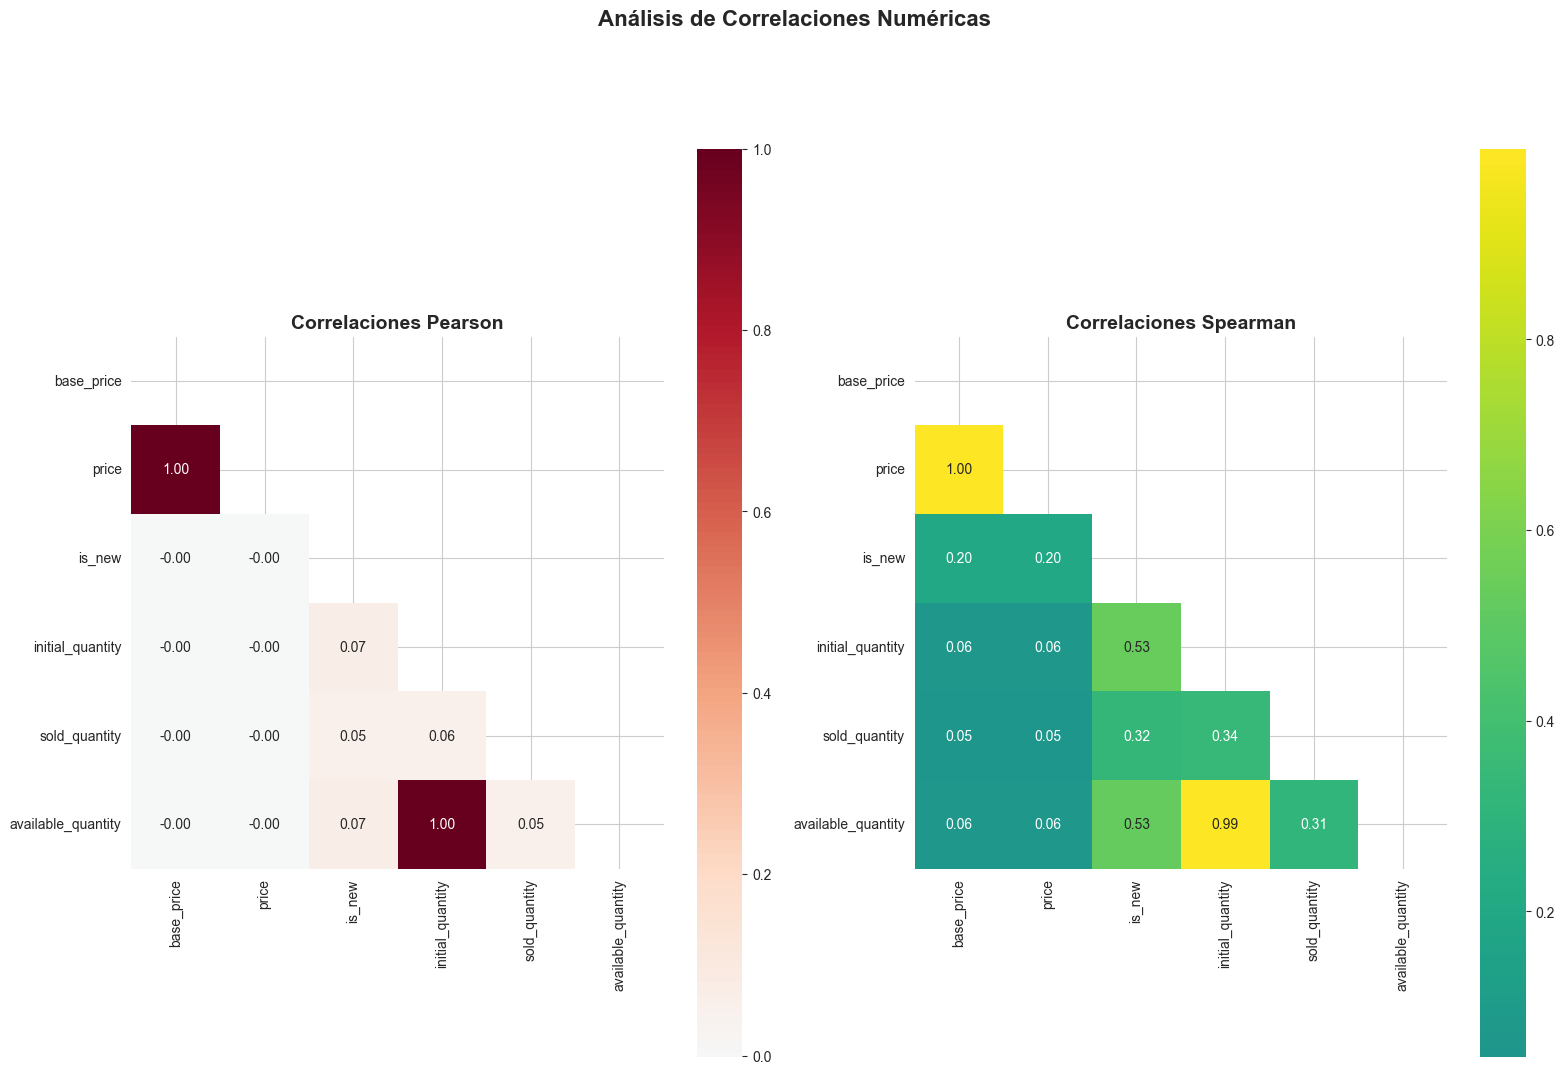


RESUMEN EJECUTIVO

PEARSON:
   • Correlaciones significativas: 2/15 (13.3%)
   • Correlación más fuerte: base_price vs price (r=+1.000)
   • Distribución: Muy Fuerte: 2, 

SPEARMAN:
   • Correlaciones significativas: 9/15 (60.0%)
   • Correlación más fuerte: base_price vs price (r=+1.000)
   • Distribución: Muy Fuerte: 2, Moderada: 2, Débil: 3, 

💡 RECOMENDACIONES:
   🔄 Considerar remover variables redundantes (correlación = 1.0)


In [10]:
resultados = analisis_correlaciones_numericas(
    data, 
    threshold=0.1,           # Mostrar correlaciones >= 0.1
    method='all',            # Usar todos los métodos
    show_values=True,        # Mostrar valores en heatmaps
    save_plots=True          # Guardar gráficos
)

# Nulos

In [ ]:
import pandas as pd
import numpy as np

def nulls_preprocessing(data, threshold=0.5, verbose=True):
    """
    Preprocesa los valores nulos en el DataFrame.
    
    Para cada columna:
    - Si % de nulos >= threshold: elimina la columna completa
    - Si % de nulos < threshold: elimina solo los registros con nulos en esa columna
    
    Args:
        data (pd.DataFrame): DataFrame con valores nulos.
        threshold (float): Umbral para decidir eliminar columna (por defecto 0.5 = 50%).
        verbose (bool): Mostrar información del proceso.
        
    Returns:
        pd.DataFrame: DataFrame con valores nulos preprocesados.
    """
    
    if data is None or data.empty:
        print("❌ DataFrame vacío o None")
        return data
    
    # Crear copia para no modificar el original
    df_processed = data.copy()
    original_shape = df_processed.shape
    
    # Listas para tracking
    columns_dropped = []
    columns_cleaned = []
    
    if verbose:
        print("🔍 ANÁLISIS DE VALORES NULOS POR COLUMNA")
        print("=" * 55)
        print(f"Forma original: {original_shape[0]:,} filas x {original_shape[1]} columnas")
        print(f"Umbral para eliminar columna: {threshold*100:.0f}%")
        print()
    
    # Procesar cada columna individualmente
    for col in data.columns:
        null_count = df_processed[col].isnull().sum()
        total_rows = len(df_processed)
        null_percentage = (null_count / total_rows) if total_rows > 0 else 0
        
        if null_count == 0:
            # No hay nulos, no hacer nada
            if verbose:
                print(f"✅ {col:<25}: Sin nulos")
            continue
            
        elif null_percentage >= threshold:
            # Muchos nulos: eliminar columna completa
            df_processed = df_processed.drop(columns=[col])
            columns_dropped.append({
                'columna': col,
                'nulos': null_count,
                'porcentaje': null_percentage * 100,
                'total_filas_momento': total_rows
            })
            if verbose:
                print(f"🗑️  {col:<25}: Columna eliminada ({null_count:,} nulos, {null_percentage*100:.1f}%)")
        else:
            # Pocos nulos: eliminar solo las filas con nulos en esta columna
            rows_before = len(df_processed)
            df_processed = df_processed.dropna(subset=[col])
            rows_after = len(df_processed)
            rows_dropped = rows_before - rows_after
            
            columns_cleaned.append({
                'columna': col,
                'nulos_originales': null_count,
                'porcentaje_original': null_percentage * 100,
                'filas_eliminadas': rows_dropped
            })
            if verbose:
                print(f"🧹 {col:<25}: Filas limpiadas ({rows_dropped:,} filas eliminadas, {null_percentage*100:.1f}% nulos)")
    
    # Estadísticas finales
    final_shape = df_processed.shape
    total_nulls_remaining = df_processed.isnull().sum().sum()
    
    if verbose:
        print()
        print("📊 RESUMEN FINAL")
        print("=" * 30)
        print(f"Forma final: {final_shape[0]:,} filas x {final_shape[1]} columnas")
        print(f"Filas eliminadas: {original_shape[0] - final_shape[0]:,}")
        print(f"Columnas eliminadas: {len(columns_dropped)}")
        print(f"Columnas limpiadas: {len(columns_cleaned)}")
        print(f"Nulos restantes: {total_nulls_remaining:,}")
        
        if columns_dropped:
            print(f"\n🗑️  COLUMNAS ELIMINADAS ({len(columns_dropped)}):")
            for col_info in columns_dropped:
                print(f"   • {col_info['columna']}: {col_info['porcentaje']:.1f}% nulos")
        
        if columns_cleaned:
            print(f"\n🧹 COLUMNAS LIMPIADAS ({len(columns_cleaned)}):")
            for col_info in columns_cleaned[:5]:  # Mostrar solo las primeras 5
                print(f"   • {col_info['columna']}: {col_info['filas_eliminadas']:,} filas eliminadas")
            if len(columns_cleaned) > 5:
                print(f"   • ... y {len(columns_cleaned) - 5} columnas más")
        
        if total_nulls_remaining > 0:
            print(f"\n⚠️  Advertencia: Quedan {total_nulls_remaining:,} valores nulos")
        else:
            print(f"\n✅ Resultado: Dataset completamente limpio")


        # Calcular estadísticas
        nulls_before = data.isnull().sum().sum()
        nulls_after = df_processed.isnull().sum().sum()
        
        rows_dropped = data.shape[0] - df_processed.shape[0]
        cols_dropped = data.shape[1] - df_processed.shape[1]
        
        # Identificar qué columnas se eliminaron
        dropped_columns = set(data.columns) - set(df_processed.columns)
        
        markdown = f"""
⚙️ Configuración
- **Umbral para eliminar columna**: {threshold*100:.0f}%
- **Estrategia**: Eliminar columna si nulos ≥ {threshold*100:.0f}%, sino eliminar filas con nulos

📊 Resultados

| Métrica | Antes | Después | Cambio |
|---------|-------|---------|---------|
| **Filas** | {data.shape[0]:,} | {df_processed.shape[0]:,} | -{rows_dropped:,} |
| **Columnas** | {data.shape[1]:,} | {df_processed.shape[1]:,} | -{cols_dropped:,} |
| **Valores nulos** | {nulls_before:,} | {nulls_after:,} | -{nulls_before - nulls_after:,} |

🗑️ Elementos Eliminados
- **Columnas eliminadas**: {len(dropped_columns)}
- **Filas eliminadas**: {rows_dropped:,}
"""
        
        if dropped_columns:
            markdown += "#### Columnas Eliminadas:\n"
            for i, col in enumerate(sorted(dropped_columns), 1):
                # Calcular porcentaje de nulos que tenía esta columna
                null_pct = (data[col].isnull().sum() / len(data)) * 100
                markdown += f"{i}. `{col}` ({null_pct:.1f}% nulos)\n"
        
        # Estado final
        if nulls_after == 0:
            markdown += "\n✅ Resultado: Dataset completamente limpio\n"
        else:
            remaining_nulls = df_processed.isnull().sum()
            remaining_nulls = remaining_nulls[remaining_nulls > 0]
            
            markdown += f"\n⚠️ Nulos Restantes: {len(remaining_nulls)} columnas\n"
            for col, count in remaining_nulls.head(5).items():
                pct = (count / len(df_processed)) * 100
                markdown += f"- **{col}**: {count:,} nulos ({pct:.1f}%)\n"
    
    return df_processed, markdown

    # Preprocesar con umbral del 50%
data_clean, markdown = nulls_preprocessing(data, threshold=0.5)

# Generar markdown
print("\n📝 RESUMEN MARKDOWN:")
print(markdown)

🔍 ANÁLISIS DE VALORES NULOS POR COLUMNA
Forma original: 100,000 filas x 26 columnas
Umbral para eliminar columna: 50%

🧹 id                       : Filas limpiadas (4 filas eliminadas, 0.0% nulos)
🧹 title                    : Filas limpiadas (4 filas eliminadas, 0.0% nulos)
✅ date_created             : Sin nulos
✅ base_price               : Sin nulos
✅ price                    : Sin nulos
✅ category_id              : Sin nulos
✅ tags                     : Sin nulos
✅ attributes               : Sin nulos
✅ variations               : Sin nulos
✅ pictures                 : Sin nulos
✅ seller_id                : Sin nulos
🧹 seller_country           : Filas limpiadas (3 filas eliminadas, 0.0% nulos)
✅ seller_province          : Sin nulos
🧹 seller_city              : Filas limpiadas (1 filas eliminadas, 0.0% nulos)
✅ seller_loyalty           : Sin nulos
✅ buying_mode              : Sin nulos
✅ shipping_mode            : Sin nulos
✅ shipping_admits_pickup   : Sin nulos
✅ shipping_is_free     

# Preprocesamiento e Ingenieria de Características

In [ ]:
# Tu código inicial
data['new_date'] = pd.to_datetime(data['date_created'], errors='coerce')
data["year"] = data['new_date'].dt.year
data["month"] = data['new_date'].dt.month
data["day"] = data['new_date'].dt.day

# Crear columna de fecha completa para agrupación
data['date'] = data['new_date'].dt.date

# Conteo de IDs únicos por día completo (año-mes-día)
conteo_diario = data.groupby('date')['id'].nunique().reset_index()
conteo_diario.columns = ['fecha', 'conteo_ids']

# Ordenar por fecha
conteo_diario = conteo_diario.sort_values('fecha')

print(f"Datos procesados: {len(conteo_diario)} días únicos")
print(f"Rango de fechas: {conteo_diario['fecha'].min()} a {conteo_diario['fecha'].max()}")
print(f"Total de IDs únicos en el período: {data['id'].nunique()}")

def graficar_conteo_diario_ids(conteo_diario, prefix=''):
    """
    Grafica el conteo de IDs únicos por día.
    
    Args:
        conteo_diario (pd.DataFrame): DataFrame con columnas 'fecha' y 'conteo_ids'
    """
    if len(conteo_diario) == 0:
        print("No hay datos para graficar")
        return
    
    # Configurar el estilo
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # Gráfico de línea principal
    ax.plot(conteo_diario['fecha'], conteo_diario['conteo_ids'], 
            color='steelblue', linewidth=2, marker='o', markersize=4, alpha=0.8)
    
    # Personalización del gráfico
    ax.set_title('Conteo de IDs Únicos por Día', fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Fecha', fontsize=14, fontweight='bold')
    ax.set_ylabel('Número de IDs Únicos', fontsize=14, fontweight='bold')
    
    # Rotar etiquetas del eje X
    plt.xticks(rotation=45, ha='right')
    
    # Añadir grid para mejor legibilidad
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Estadísticas para mostrar en el gráfico
    promedio = conteo_diario['conteo_ids'].mean()
    maximo = conteo_diario['conteo_ids'].max()
    minimo = conteo_diario['conteo_ids'].min()
    total_dias = len(conteo_diario)
    
    # Línea de promedio
    ax.axhline(y=promedio, color='red', linestyle='--', alpha=0.7, label=f'Promedio: {promedio:.1f}')
    
    # Información estadística en el gráfico
    stats_text = f"""Estadísticas del período:
• Total de días: {total_dias}
• Promedio diario: {promedio:.1f} IDs
• Máximo diario: {maximo} IDs
• Mínimo diario: {minimo} IDs
• Desviación estándar: {conteo_diario['conteo_ids'].std():.1f}"""
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
            verticalalignment='top', fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
    
    # Destacar días con actividad máxima y mínima
    fecha_max = conteo_diario.loc[conteo_diario['conteo_ids'].idxmax(), 'fecha']
    fecha_min = conteo_diario.loc[conteo_diario['conteo_ids'].idxmin(), 'fecha']
    
    ax.scatter(fecha_max, maximo, color='red', s=100, zorder=5, label=f'Máximo: {fecha_max}')
    ax.scatter(fecha_min, minimo, color='orange', s=100, zorder=5, label=f'Mínimo: {fecha_min}')
    
    # Leyenda
    ax.legend(loc='upper right', framealpha=0.9)
    
    # Ajustar diseño
    sns.despine()
    plt.tight_layout()
    
    # Guardar gráfico
    plt.savefig(f'../docs/conteo_ids_por_dia{prefix}.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    
    return fig, ax

def generar_resumen_temporal(data, conteo_diario):
    """
    Genera un resumen detallado del análisis temporal.
    """
    print("\n" + "="*60)
    print("RESUMEN DEL ANÁLISIS TEMPORAL")
    print("="*60)
    
    # Información general
    total_registros = len(data)
    fechas_validas = data['new_date'].notna().sum()
    fechas_faltantes = data['new_date'].isna().sum()
    
    print(f"📊 DATOS GENERALES:")
    print(f"   • Total de registros: {total_registros:,}")
    print(f"   • Registros con fecha válida: {fechas_validas:,} ({fechas_validas/total_registros*100:.1f}%)")
    print(f"   • Registros sin fecha: {fechas_faltantes:,} ({fechas_faltantes/total_registros*100:.1f}%)")
    
    if len(conteo_diario) > 0:
        print(f"\n📅 ANÁLISIS DIARIO:")
        print(f"   • Días únicos con datos: {len(conteo_diario)}")
        print(f"   • Período analizado: {conteo_diario['fecha'].min()} al {conteo_diario['fecha'].max()}")
        print(f"   • Duración: {(conteo_diario['fecha'].max() - conteo_diario['fecha'].min()).days + 1} días")
        
        print(f"\n📈 ESTADÍSTICAS DE ACTIVIDAD DIARIA:")
        print(f"   • Promedio de IDs por día: {conteo_diario['conteo_ids'].mean():.1f}")
        print(f"   • Mediana de IDs por día: {conteo_diario['conteo_ids'].median():.1f}")
        print(f"   • Día más activo: {conteo_diario['conteo_ids'].max()} IDs")
        print(f"   • Día menos activo: {conteo_diario['conteo_ids'].min()} IDs")
        
        # Top 5 días más activos
        top_dias = conteo_diario.nlargest(5, 'conteo_ids')
        print(f"\n🏆 TOP 5 DÍAS MÁS ACTIVOS:")
        for i, (_, row) in enumerate(top_dias.iterrows(), 1):
            print(f"   {i}. {row['fecha']}: {row['conteo_ids']} IDs únicos")
        
        # Análisis por día de la semana
        conteo_diario_copy = conteo_diario.copy()
        conteo_diario_copy['dia_semana'] = pd.to_datetime(conteo_diario_copy['fecha']).dt.day_name()
        actividad_semanal = conteo_diario_copy.groupby('dia_semana')['conteo_ids'].mean().round(1)
        
        print(f"\n📊 ACTIVIDAD PROMEDIO POR DÍA DE LA SEMANA:")
        dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        dias_es = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
        
        for dia_en, dia_es in zip(dias_orden, dias_es):
            if dia_en in actividad_semanal.index:
                print(f"   • {dia_es}: {actividad_semanal[dia_en]:.1f} IDs promedio")

# Ejecutar el análisis
print("Iniciando análisis temporal...")

# Encontrar el primer día con conteo por encima del promedio
if len(conteo_diario) > 0:
    promedio = conteo_diario['conteo_ids'].mean()
    dias_sobre_promedio = conteo_diario[conteo_diario['conteo_ids'] > promedio]
    
    if len(dias_sobre_promedio) > 0:
        primer_dia_sobre_promedio = dias_sobre_promedio.iloc[0]
        print(f"\n🎯 PRIMER DÍA POR ENCIMA DEL PROMEDIO:")
        print(f"   • Fecha: {primer_dia_sobre_promedio['fecha']}")
        print(f"   • Conteo de IDs: {primer_dia_sobre_promedio['conteo_ids']} (promedio: {promedio:.1f})")
        print(f"   • Diferencia: +{primer_dia_sobre_promedio['conteo_ids'] - promedio:.1f} IDs sobre el promedio")
    else:
        print(f"\n⚠️  No hay días por encima del promedio ({promedio:.1f})")

graficar_conteo_diario_ids(conteo_diario)
generar_resumen_temporal(data, conteo_diario)

## Filtro por fecha

In [ ]:
date_filtered_data = data[data['new_date'] >= pd.to_datetime('2015-08-16', utc=True)]
date_filtered_data = date_filtered_data.sort_values(by="new_date")
date_filtered_data

count_date_filtered_data = date_filtered_data.groupby('date')['id'].nunique().reset_index()
count_date_filtered_data.columns = ['fecha', 'conteo_ids']

graficar_conteo_diario_ids(count_date_filtered_data, prefix='_filtrado')

In [ ]:
count_date_filtered_data[0:15]

In [ ]:
date_filtered_data.isnull().sum()
region_filtered_data = date_filtered_data[date_filtered_data['seller_country'].notna()]
region_filtered_data = date_filtered_data[date_filtered_data['seller_province'].notna()]
region_filtered_data = date_filtered_data[date_filtered_data['seller_city'].notna()]
region_filtered_data.isnull().sum()

region_filtered_data.drop(['sub_status','warranty'], inplace=True, axis=1)
region_filtered_data.isnull().sum()

# Se elimina base_price por duplicidad con price. Además, base_price tienen valores igual a 1 y posteriormente se convierte a price. 
price_filtered_data = region_filtered_data.drop(["base_price"], inplace=True, axis=1)




In [ ]:
max_values = {}
for column, stats in descriptive_stats.items():
        if hasattr(stats, 'loc') and 'max' in stats.index:
            max_values[column] = stats['max']
        else:
            max_values[column] = "No disponible"

max_values = pd.Series(max_values, name='Máximo').round(2)
max_values = max_values.to_frame().reset_index()

In [ ]:
max_values
